# Targets

Navground behaviors can have different types of targets.

In [232]:
from navground import core
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np

ARROW_SIZE = 0.03

def plot_pose(ax, pose, radius, color='b'):
    arrow = patches.Arrow(*pose.position, ARROW_SIZE * np.cos(pose.orientation), 
                          ARROW_SIZE * np.sin(pose.orientation), width=ARROW_SIZE, color=color)
    disc = patches.Circle(pose.position, radius=behavior.radius, color=color)
    ax.add_artist(arrow)
    ax.add_artist(disc)    

def plot_trajectory(poses, behavior, subs=5):
    ax = plt.subplot()
    ax.plot([p.position[0] for p in poses], [p.position[1] for p in poses], '--', color='b')
    for p in poses[::subs] + poses[-1:]:
        plot_pose(ax, p, radius=behavior.radius)
    plot_target(ax, behavior)
    plt.axis('equal')

def plot_target(ax, behavior, color='orange'):
    arrow_length = 0.05
    target = behavior.target
    if target.position is not None:
        ax.plot(*target.position, 'o', color=color)
        disc = patches.Circle(target.position, radius=target.position_tolerance, color=color, 
                              fill=False, linestyle='dotted')
        ax.add_artist(disc)

In [248]:
behavior = core.behaviors.DummyBehavior(
    radius=0.01,
    kinematics=core.kinematics.OmnidirectionalKinematics(
        max_speed=0.5, max_angular_speed=1.0))


def run(behavior: core.Behavior, time_step: float = 0.1, max_steps: int = 30) -> list[core.Pose2]:
    behavior.pose = core.Pose2((0, 0), 0)
    behavior.twist = core.Twist2((0, 0), 0)
    poses = []
    while not behavior.check_if_target_satisfied():
        cmd = behavior.compute_cmd(time_step=time_step)
        behavior.actuate(cmd, time_step=time_step)
        poses.append(behavior.pose)
    return poses
        

## Point

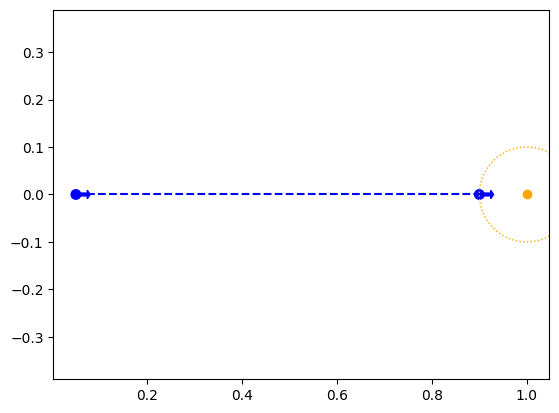

In [234]:
behavior.target = core.Target.Point((1, 0), tolerance=0.1)

poses = run(behavior)
plot_trajectory(poses, behavior, subs=100)

## Pose

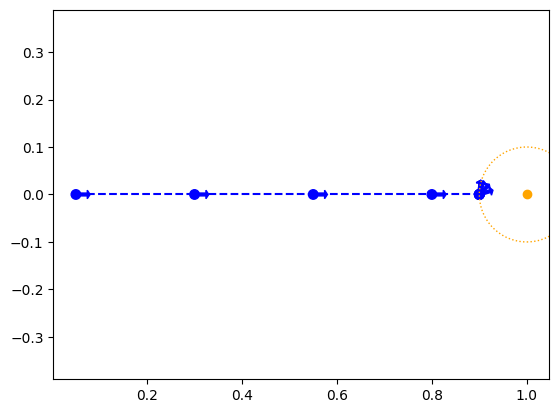

In [246]:
behavior.target = core.Target.Pose(core.Pose2((1, 0), np.pi / 2), 
                                   position_tolerance=0.1, orientation_tolerance=0.1)

poses = run(behavior)
plot_trajectory(poses, behavior, subs=5)

## Orientation

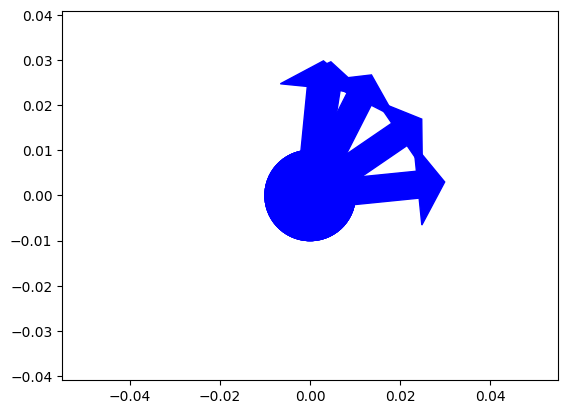

In [247]:
behavior.target = core.Target.Orientation(np.pi / 2, tolerance=0.1)

poses = run(behavior)
plot_trajectory(poses, behavior, subs=5)

## Direction

- `check_if_target_satisfied` should return `False`

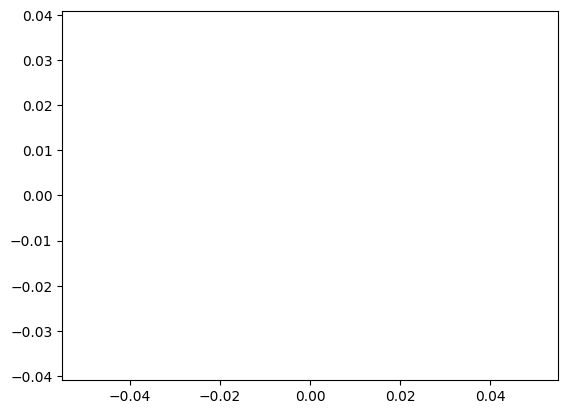

In [252]:
behavior.target = core.Target.Direction((1, 0))

poses = run(behavior)
plot_trajectory(poses, behavior, subs=5)

In [254]:
behavior.check_if_target_satisfied()

True

In [255]:
behavior.target

Target(direction=(1.000000, 0.000000))

In [256]:
core.Target.

Docstring: Twist(twist: navground.core._navground.Twist2) -> navground.core._navground.Target
Type:      builtin_function_or_method

In [257]:
# pose, curvature
def curve(s: float) -> tuple[
    core.Pose2, float]:
    ...

# linear coord along the curve
def projection(position: core.Vector2, min_coordinate: float, max_coordinate: float) -> float:
    ...

core.Target.Path(projection, curve, [length], pose, position_tolerance=0.1, orientation_tolerance=0.1)

AttributeError: type object 'navground.core._navground.Target' has no attribute 'Path'

In [ ]:
core.target.path.coordinate
core.target.path.length
core.target.path.curve
core.target.path.projection


class Path:

    coordinate: float
    length: float
    curve: Callable[[float], tuple[Pose2, Twist2]
    projection: Callable[[Vector2], float]

    Path(projection, curve, length)